# Project Description

We are analyzing data for Zuber, a new ride-sharing company that's launching in Chicago. We are looking for patterns in the available information to understand passenger preferences and the impact of external factors on rides.

## Exploratory Data Analysis 

### Importing 

#### Importing Libraries

In [6]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import linregress
import math
import plotly.express as px
import requests
from bs4 import BeautifulSoup

#### Import and Review data

In [7]:
URL = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')
table = soup.find("table", attrs={"id": "weather_records"})
heading_table = []
for row in soup.find_all('th'):
    heading_table.append(row.text)

content = []
for row in table.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])

weather_records = pd.DataFrame(content, columns=heading_table)
display(weather_records.head())

,Date and time,Temperature,Description
0,2017-11-01 00:00:00,276.150,broken clouds
1,2017-11-01 01:00:00,275.700,scattered clouds
2,2017-11-01 02:00:00,275.610,overcast clouds
3,2017-11-01 03:00:00,275.350,broken clouds
4,2017-11-01 04:00:00,275.240,broken clouds


In [10]:
# Import files 01. Print sample and information of dataframe
one = pd.read_csv(
    'C:/Users/Tina/Documents/TripleTen/PythonScripts/6/moved_project_sql_result_01.csv')
display(one.head(5))
one.info()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [17]:
# Check for duplicates of file 01
print(one.duplicated().sum())

0


<div class="alert alert-info"> <b> Data Review </b>:
    <li> No missing values in any of the columns.</li>
    <li> Both columns are in appropriate data type. </li>

In [14]:
# Import files 04. Print sample and information of dataframe
four = pd.read_csv(
    'C:/Users/Tina/Documents/TripleTen/PythonScripts/6/moved_project_sql_result_04.csv')
display(four.head(5))
four.info()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [13]:
# Check for duplicates of file 04
print(four.duplicated().sum())

0


<div class="alert alert-info"> <b> Data Review </b>:
    <li> No missing values in any of the columns.</li>
    <li> Both columns are in appropriate data type. </li>

In [18]:
# Import files 07. Print sample and information of dataframe.
svn = pd.read_csv(
    'C:/Users/Tina/Documents/TripleTen/PythonScripts/6/moved_project_sql_result_07.csv')
display(svn.head(5))
svn.info()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [15]:
# Check for duplicates of file 01
print(svn.duplicated().sum())

197


<div class="alert alert-info"> <b> Data Review </b>:
    <li> This contains data on rides from the Loop to O'Hare International Airport.</li>
    <li> No missing values in any of the columns.</li>
    <li> start_ts column is in object data type but needs to be converted to datetime data type.</li>
    <li> There are 197 duplicates and would need to be edited before further analysis. </li>

<div class="alert alert-info"> <b> Overall Data Review </b>:
    <li> There is no missing values in all data and all columns of 3 files. There are some data type issue and duplicate issue in DataFrame svn, and would need to be cleaned before further analysis.

## Top 10 Neighborhoods and Taxi Companies
In this section we will identify the top 10 neighborhoods and number of rides vs Taxi Companies. 

### Identifying the Top 10 Neighborhoods by dropoff location

In [19]:
# Sort the DataFrame four in descending order by average number of rides that ended in each neighborhood and select the top 10.

four_sorted = four.sort_values(by='average_trips', ascending=False).head(10)
display(four_sorted)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Number of Rides by Taxi Companies

In [20]:
# Let's find the top 20 companies with most number of rides
one_sorted = one.groupby('company_name')['trips_amount'].sum().reset_index()
one_sorted = one_sorted.sort_values(
    by='trips_amount', ascending=False).head(20)
display(one_sorted)

,company_name,trips_amount
45,Flash Cab,19558
61,Taxi Affiliation Services,11422
50,Medallion Leasin,10367
63,Yellow Cab,9888
60,Taxi Affiliation Service Yellow,9299
36,Chicago Carriage Cab Corp,9181
43,City Service,8448
59,Sun Taxi,7701
58,Star North Management LLC,7455
33,Blue Ribbon Taxi Association Inc.,5953


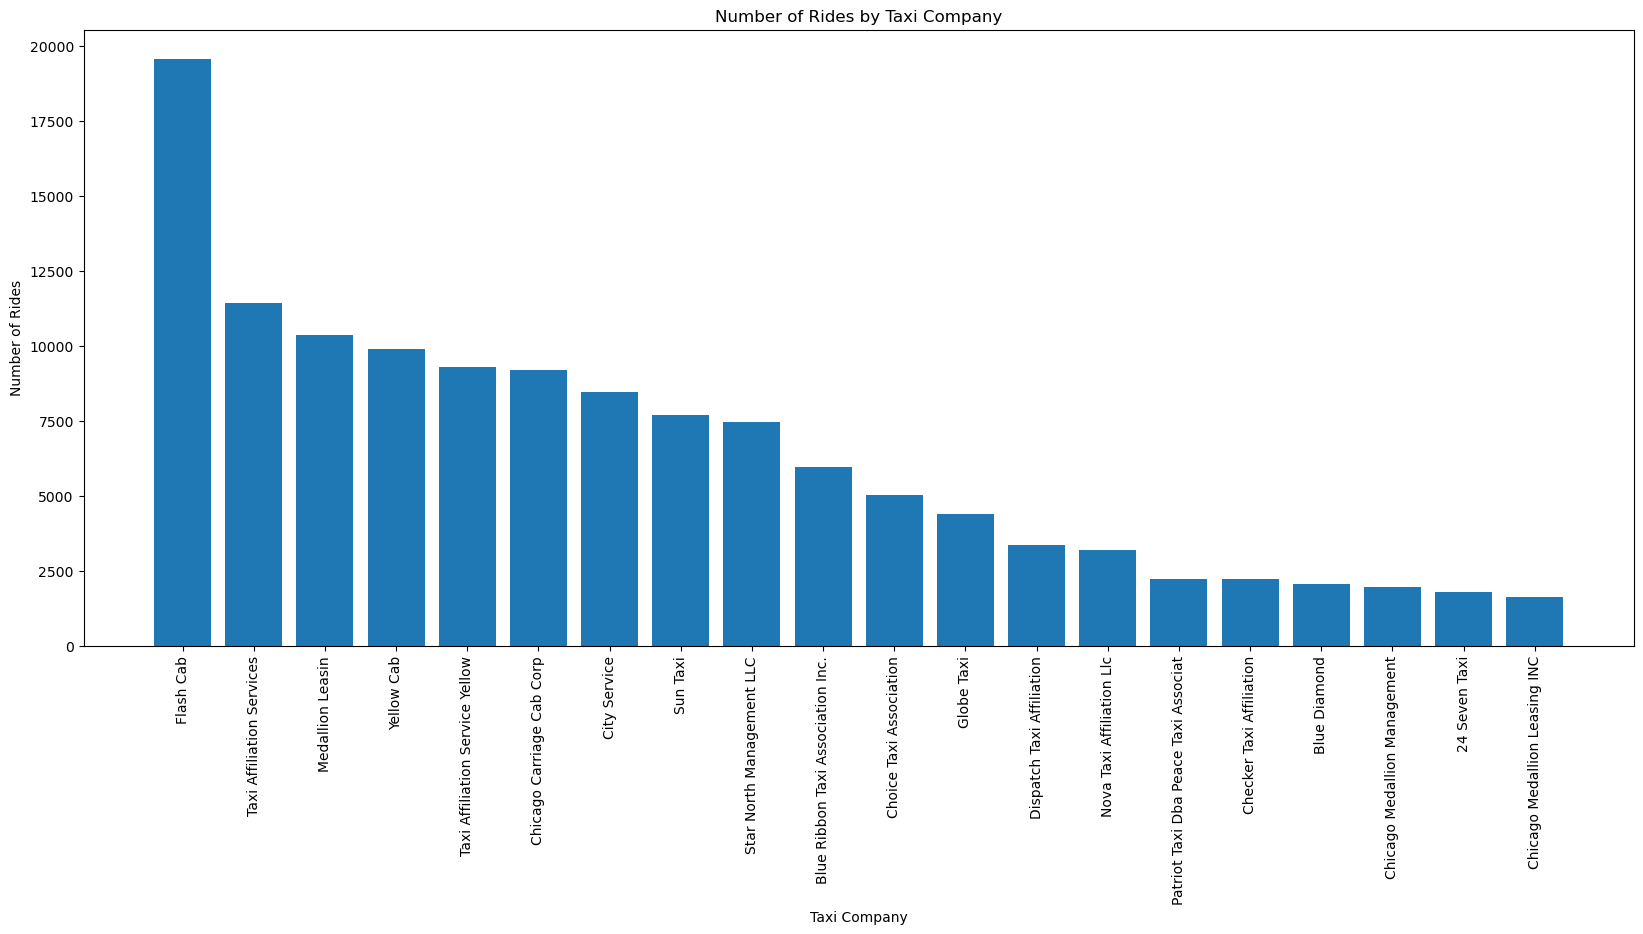

In [21]:
plt.figure(figsize=(20, 8))
plt.bar(one_sorted['company_name'], one_sorted['trips_amount'])
plt.xlabel('Taxi Company')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Taxi Company')
plt.xticks(rotation=90)

plt.show()

In [22]:
display(one_sorted.describe())

,trips_amount
count,20.000000
mean,6352.900000
std,4547.601206
min,1607.000000
25%,2230.250000
50%,5484.000000
75%,9210.500000
max,19558.000000


<div class="alert alert-info"> <b>Observation</b>:
    <li> Number of rides of the top 20 companies vary between 1607 rides to 19558 rides. </li>
    <li> Average rides of the top 20 companies is 6352 rides. </li>
    <li> Mean of the top 20 companies is 5484 rides. </li>

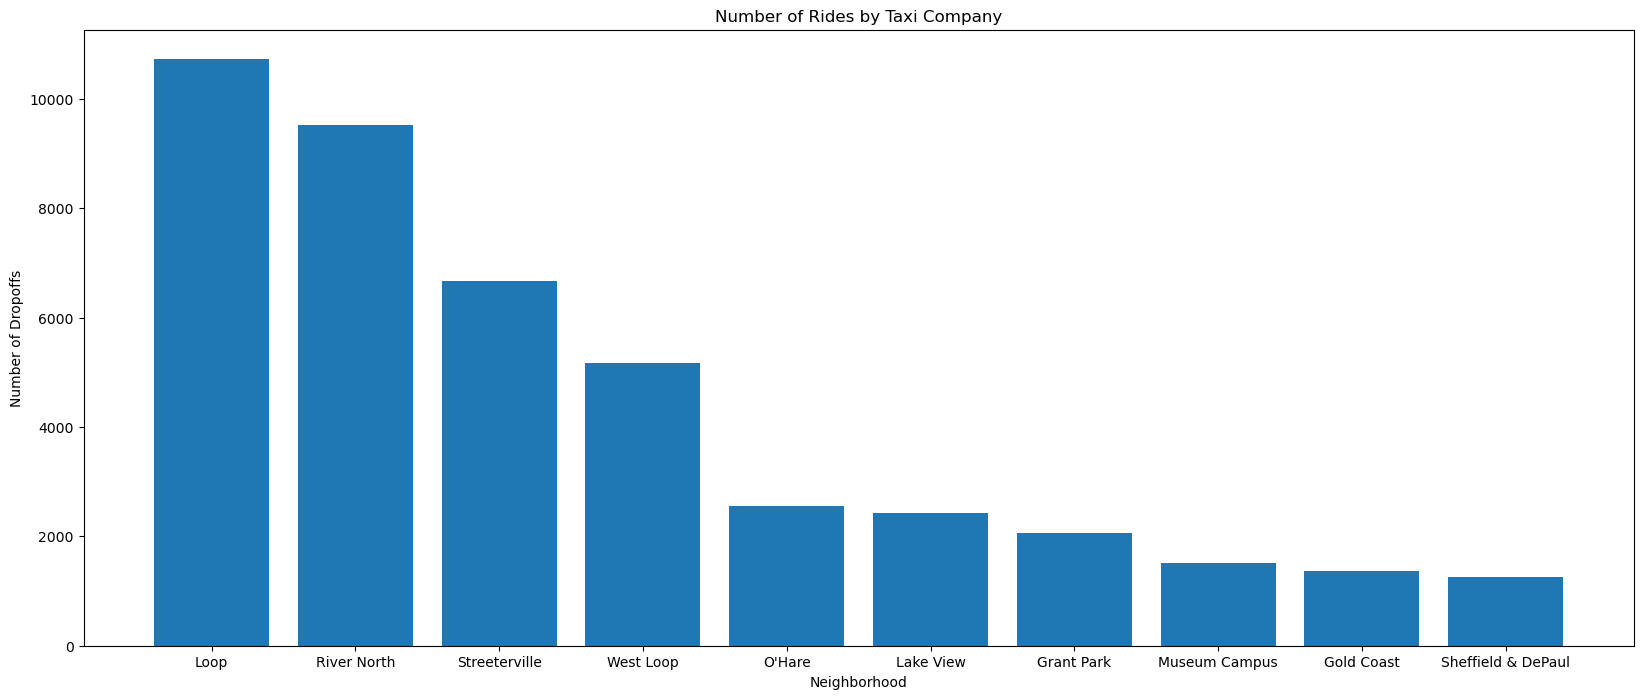

In [23]:
plt.figure(figsize=(20, 8))
plt.bar(four_sorted['dropoff_location_name'], four_sorted['average_trips'])
plt.xlabel('Neighborhood')
plt.ylabel('Number of Dropoffs')
plt.title('Number of Rides by Taxi Company')

plt.show()

In [24]:
display(four_sorted.describe())

,average_trips
count,10.000000
mean,4324.986667
std,3530.183508
min,1259.766667
25%,1649.633333
50%,2483.933333
75%,6289.416667
max,10727.466667


<div class="alert alert-info"> <b>Observation</b>:
    <li> Most popular dropoff nieghborhood is Loop with average of 10,727. </li>
    <li> Top 10 neighborhood drop off number vary between 1259 - 10727 averge dropoffs. </li>
    <li> Weighted average of the Top 10 neighborhood is 4324 dropoffs.</li>

## Hypothesis Testing
In this section we will test to see if the average duration of rides from the Loop to O'hare International Airport changes on rainy Saturdays.

In [25]:
# Change start_ts to datetime data type
svn['start_ts'] = pd.to_datetime(svn['start_ts'])

In [26]:
# Let's add the dow (day of week) column to svn

svn['dow'] = svn['start_ts'].dt.dayofweek

svn['dow'] = svn['dow'].map({
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
})

<div class="alert alert-info"> <b>Setting up hypothesis</b>:
    <li> Hypothesis is that average duration of rides from the Loop to O'hare International Airport changes on rainy Saturdays.</li>
    <li> Since we are comparing two groups' average (rainy and not-rainy day; in this case bad vs good weather) and there is no specific threshold we are testing, we will conduct the test with two-tail test.</li>
    <li> Null hypothesis needs to be represented with =, so our null hypothesis(H0) in this case will be: Average duration of rides from the Loop to O'hare International Aiport on rainy and not rainy Saturdays are same. </li>
    <li> Our alternative hypothesis(H1) will be: Average duration of rides from the Loop to O'hare International Aiport on rainy and not rainy Saturdays are not the same. </li>
    <li> We will test the hypothesis with alpha of .05</li>

In [27]:
# Remove duplicates from the DataFrame svn
svn_dup_removed = svn.drop_duplicates().reset_index()

# Filter data for Saturdays
svn_sat = svn_dup_removed[svn['dow'] == 'Sat'].reset_index()

# Average duration of the Loop to O'hare International Airport on rainy/bad weather_condition
rainy = svn_sat[svn_sat['weather_conditions'] == 'Bad']['duration_seconds']

# Average duration of the Loop to O'hare International Airport on not-rainy/good weather_condition
sunny = svn_sat[svn_sat['weather_conditions'] == 'Good']['duration_seconds']

alpha = 0.05

test = st.ttest_ind(rainy, sunny, equal_var=False)
print('p-value:', test.pvalue)

if test.pvalue < alpha:
    print("We reject the null hypothesis that the average duration of rides from the Loop to O'hare International Aiport on rainy and not rainy Saturdays are same.")
else:
    print("We accept the null hypothesis that the average duration of rides from the Loop to O'hare International Aiport on rainy and not rainy Saturdays are not the same.")

p-value: 9.126383933880083e-08
We reject the null hypothesis that the average duration of rides from the Loop to O'hare International Aiport on rainy and not rainy Saturdays are same.


C:\Users\Tina\AppData\Local\Temp\ipykernel_1360\2476894804.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  svn_sat = svn_dup_removed[svn['dow'] == 'Sat'].reset_index()


<div class="alert alert-info"> Conclusion of the test:
    There is no statistical evidence for us to conclude that average duration of rides from the Loop to O'hare International Airport is same between rainy and not-rainy day.

<div class="alert alert-info"> <b>Overall Conclusion</b>:
    <li> Top 3 most popular popular neighborhood by dropoff location is:
        <ul>
            <li> Loop </li>
            <li> River North </li>
            <li> Streeterville </li>
        </ul>
    </li>
    <li> When top 10 neigborhood was compared:
        <ul>
            <li> Top 10 neighborhood drop off number vary between 1259 - 10727 averge dropoffs. </li>
            <li> Weighted average of the Top 10 neighborhood is 4324 dropoffs.</li>
        </ul>
    </li>
    <li> Top 3 most riden Taxi Companies are:
        <ul>
            <li> Flash Cab </li>
            <li> Taxi Affiliation Services </li>
            <li> Medallion Leasing </li>
        </ul>
    </li>
    <li> When top 20 taxi panies are compared:
        <ul>
            <li> Number of rides of the top 20 companies vary between 1607 rides to 19558 rides. </li>
            <li> Average rides of the top 20 companies is 6352 rides. </li>
            <li> Mean of the top 20 companies is 5484 rides. </li>
        </ul>
    </li>
    <li> There is no statistical evidence for us to conclude that average duration of rides from the Loop to O'hare International Airport differ on rainy and non-rainy day.</li>